## NOTAS: CONFORME SE AVANZA EN EL NOTEBOOK HE MARCADO LAS CELDAS COMO NOTAS Y DUDAS.



In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [3]:
pak_df= df[(df['country_name'] == 'Pakistan')]
pak_df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
3709,PAK,Pakistan,1972,1.555648e+10,32.802297,18903049,6.774575,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.720695,61381982,-0.456
3710,PAK,Pakistan,1973,1.581553e+10,32.458662,20008479,15.301474,0.0,0.0,474.0,...,0.0,0.0,2.590692,661500.0,661500.0,7607.093615,474.0,2.759498,63099404,0.126
3711,PAK,Pakistan,1974,1.647672e+10,31.876688,21387398,26.073702,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.822868,64905996,-0.163
3712,PAK,Pakistan,1975,1.612762e+10,30.160186,23187848,21.098099,0.0,14.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,14.0,2.901566,66816875,-0.553
3713,PAK,Pakistan,1976,1.684926e+10,29.408426,22788525,11.502460,0.0,0.0,338.0,...,0.0,0.0,0.958758,505000.0,505000.0,8086.120231,338.0,2.974685,68834324,-0.250


In [4]:
pak_df= pak_df.drop(['country_name'], axis=1)
pak_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [5]:
pak_df= pak_df[(pak_df['year'] >= 1988) & (pak_df['year'] <= 2020)]
pak_df.set_index('year',inplace = True)
pak_df.head(5)

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1988,PAK,2.625180e+10,23.153323,57607377,9.617561,0.0,0.0,196.0,36.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,232.0,3.109138,101389603,0.748
1989,PAK,2.805538e+10,23.913634,60316616,8.585048,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,136.250993,20.0,3.033971,104512874,-0.291
1990,PAK,2.890564e+10,23.067073,67827369,6.451999,0.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,18.0,2.955562,107647918,0.426
1991,PAK,3.033997e+10,22.842446,67477105,13.492416,0.0,523.0,24.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,547.0,2.866823,110778655,-0.226
1992,PAK,3.322267e+10,23.310013,72014921,10.201408,0.0,0.0,1446.0,0.0,0.0,...,0.0,0.0,0.511526,1000230.0,1000230.0,8680.946528,1446.0,2.788444,113911126,-0.375


In [6]:
pak_df = pak_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
pak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               33 non-null     float64
 1   agriculture_value_added_percentage_gdp          33 non-null     float64
 2   annual_co2_emissions_tons                       33 non-null     int64  
 3   inflation_inflation_gdp_deflation               33 non-null     float64
 4   economic_damages_as_a_share_of_gdp              33 non-null     float64
 5   people_affected_per_100k                        33 non-null     float64
 6   number_of_deaths                                33 non-null     float64
 7   population_population_growth_annual_percentage  33 non-null     float64
 8   population_population_total                     33 non-null     int64  
 9   temperature_change_temp_change_celsius  

In [7]:
pak_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

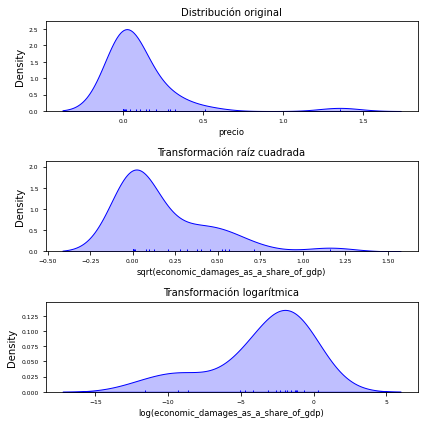

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    pak_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [9]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(pak_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,877.287374,2388.244345,122.236823,inf,0.562197,2.300506e-10
gamma,1408.634965,260.069635,134.367195,inf,0.539579,1.610246e-09
exponpow,1459.716662,363.973920,135.542695,inf,0.484838,1.148518e-07
expon,1659.460292,823.961040,136.278440,inf,0.574076,7.908193e-11
powerlaw,1675.701663,148.984239,140.096353,inf,0.546871,8.704507e-10
lognorm,1729.517739,594.406297,141.139503,inf,0.484847,1.147777e-07
chi2,1799.125635,193.154922,142.441623,inf,0.573842,8.079408e-11
logistic,2047.660630,943.553570,143.215223,inf,0.347238,4.642936e-04
norm,2131.994941,664.925964,144.547108,inf,0.335758,8.060702e-04
cauchy,2270.166164,2273.860681,146.619340,inf,0.487300,9.601146e-08


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

In [10]:
# Visualize the data using scatter plot and histogram
#sb.set_palette('colorblind')
#sb.pairplot(data=hti_df, height=3)

In [11]:
pak_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,-0.317693,0.958719,-0.100523,0.154304,0.191597,0.091037,-0.959199,0.996825,0.565707
agriculture_value_added_percentage_gdp,-0.317693,1.000000,-0.486450,0.341358,0.077632,0.109613,0.063687,0.383224,-0.348133,-0.223931
annual_co2_emissions_tons,0.958719,-0.486450,1.000000,-0.129590,0.082233,0.069350,0.021686,-0.905623,0.967943,0.595437
inflation_inflation_gdp_deflation,-0.100523,0.341358,-0.129590,1.000000,0.008597,-0.057758,-0.135715,0.132932,-0.121884,-0.064453
economic_damages_as_a_share_of_gdp,0.154304,0.077632,0.082233,0.008597,1.000000,0.598351,0.680708,-0.197608,0.145934,0.141311
people_affected_per_100k,0.191597,0.109613,0.069350,-0.057758,0.598351,1.000000,0.436827,-0.216115,0.178761,-0.089378
number_of_deaths,0.091037,0.063687,0.021686,-0.135715,0.680708,0.436827,1.000000,-0.111178,0.082309,-0.069305
population_population_growth_annual_percentage,-0.959199,0.383224,-0.905623,0.132932,-0.197608,-0.216115,-0.111178,1.000000,-0.960922,-0.586630
population_population_total,0.996825,-0.348133,0.967943,-0.121884,0.145934,0.178761,0.082309,-0.960922,1.000000,0.581714
temperature_change_temp_change_celsius,0.565707,-0.223931,0.595437,-0.064453,0.141311,-0.089378,-0.069305,-0.586630,0.581714,1.000000


In [12]:
pak_corr_df = pak_df.corr(method='spearman')

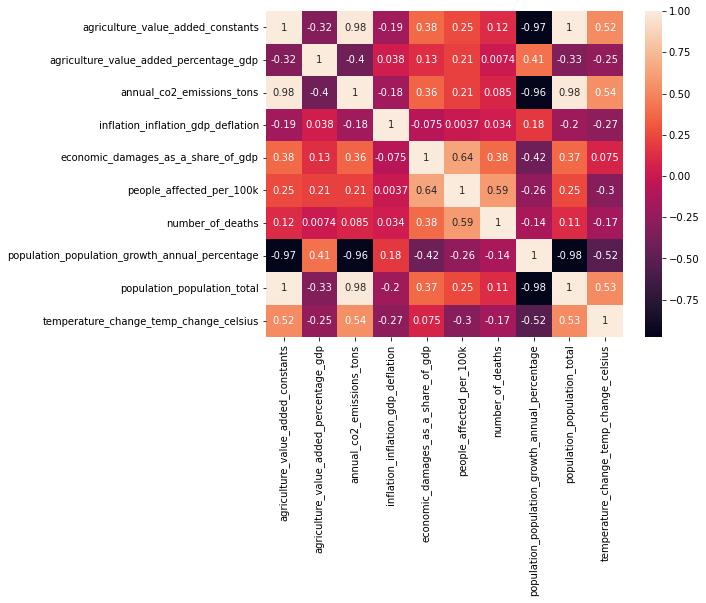

In [13]:
plt.figure(figsize=(8, 6))
sb.heatmap(pak_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [14]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.5817137802322431
Correlación spearman:  0.5287433155080213
Correlación kendall:  0.3939393939393939


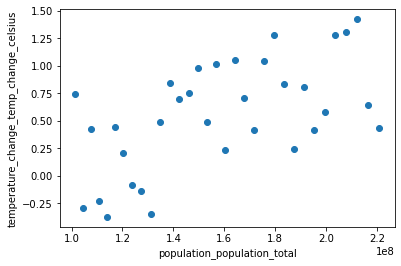

In [15]:
plt.scatter(pak_df.population_population_total , pak_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [16]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  -0.5866303460576427
Correlación spearman:  -0.5197192513368984
Correlación kendall:  -0.39772727272727276


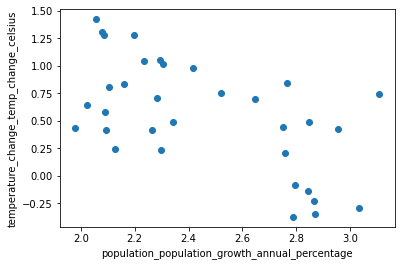

In [17]:
plt.scatter(pak_df.population_population_growth_annual_percentage, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [18]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.5954368345453294
Correlación spearman:  0.5391042780748664
Correlación kendall:  0.4090909090909091


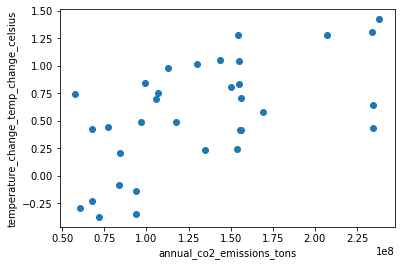

In [19]:
plt.scatter(pak_df.annual_co2_emissions_tons, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [20]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.14131065053806668
Correlación spearman:  0.07526070920005642
Correlación kendall:  0.05601783308279374


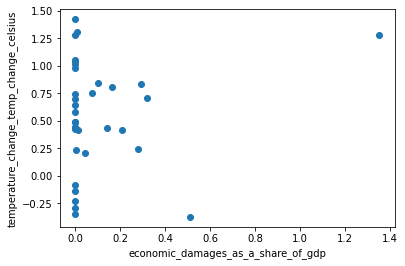

In [21]:
plt.scatter(pak_df.economic_damages_as_a_share_of_gdp, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [22]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [23]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  -0.06930548669175417
Correlación spearman:  -0.1697860962566845
Correlación kendall:  -0.12878787878787878


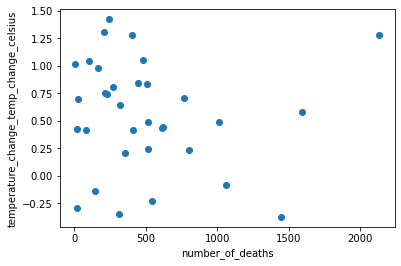

In [24]:
plt.scatter(pak_df.number_of_deaths, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [25]:
# Correlación sin outlier
#Pendiente


In [26]:
print('Correlación Pearson: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.6807077079198364
Correlación spearman:  0.3837586162512311
Correlación kendall:  0.31456167808030333


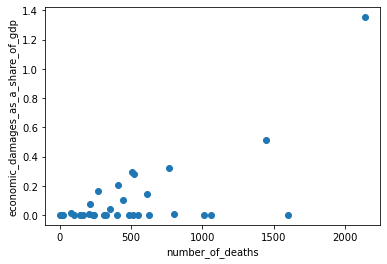

In [27]:
plt.scatter(pak_df.number_of_deaths, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [28]:
# Correlación sin outlier
#Pendiente


In [29]:
print('Correlación Pearson: ',pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.5983510081030363
Correlación spearman:  0.6405269640989485
Correlación kendall:  0.5158497671834821


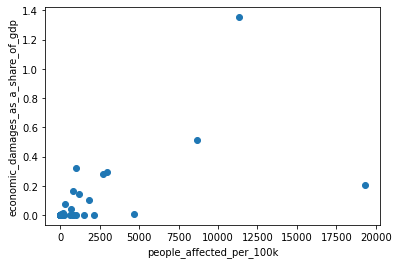

In [30]:
plt.scatter(pak_df.people_affected_per_100k, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [31]:
# Correlación sin outlier
#Pendiente


In [32]:
print('Correlación Pearson: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  0.00859738561311875
Correlación spearman:  -0.07490570585477313
Correlación kendall:  -0.034472512666334616


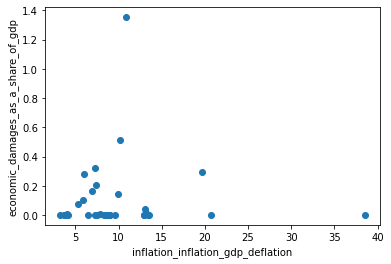

In [33]:
plt.scatter(pak_df.inflation_inflation_gdp_deflation, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [34]:
print('Correlación Pearson: ', pak_df['inflation_inflation_gdp_deflation'].corr(pak_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', pak_df['inflation_inflation_gdp_deflation'].corr(pak_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', pak_df['inflation_inflation_gdp_deflation'].corr(pak_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  -0.10052337381644305
Correlación spearman:  -0.18649732620320858
Correlación kendall:  -0.14015151515151514


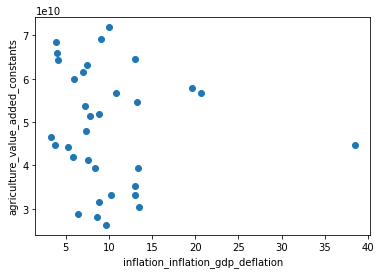

In [35]:
plt.scatter(pak_df.inflation_inflation_gdp_deflation, pak_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [36]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.5817137802322427, p-value=0.00038415364315699937
Correlación Spearman: r=0.5287433155080213, p-value=0.0015594998114863562
Correlación Pearson: r=0.3939393939393939, p-value=0.001046196742286816


## Normalizando una variable 

In [37]:
normalized_ND_2 = pak_df['number_of_deaths']/np.linalg.norm(pak_df['number_of_deaths'])
pak_df = pak_df.assign(normalized_ND_2=normalized_ND_2)
pak_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1988,2.625180e+10,23.153323,57607377,9.617561,0.000000,0.000000,232.0,3.109138,101389603,0.748,0.058235
1989,2.805538e+10,23.913634,60316616,8.585048,0.000000,136.250993,20.0,3.033971,104512874,-0.291,0.005020
1990,2.890564e+10,23.067073,67827369,6.451999,0.000000,0.000000,18.0,2.955562,107647918,0.426,0.004518
1991,3.033997e+10,22.842446,67477105,13.492416,0.000000,0.000000,547.0,2.866823,110778655,-0.226,0.137305
1992,3.322267e+10,23.310013,72014921,10.201408,0.511526,8680.946528,1446.0,2.788444,113911126,-0.375,0.362967


In [38]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  -0.06930548669175415
Correlación spearman:  -0.1697860962566845
Correlación kendall:  -0.12878787878787878


In [39]:
normalized_EDPGDP = pak_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(pak_df['economic_damages_as_a_share_of_gdp'])
pak_df = pak_df.assign(normalized_EDPGDP=normalized_EDPGDP)
pak_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.625180e+10,23.153323,57607377,9.617561,0.000000,0.000000,232.0,3.109138,101389603,0.748,0.058235,0.000000
1989,2.805538e+10,23.913634,60316616,8.585048,0.000000,136.250993,20.0,3.033971,104512874,-0.291,0.005020,0.000000
1990,2.890564e+10,23.067073,67827369,6.451999,0.000000,0.000000,18.0,2.955562,107647918,0.426,0.004518,0.000000
1991,3.033997e+10,22.842446,67477105,13.492416,0.000000,0.000000,547.0,2.866823,110778655,-0.226,0.137305,0.000000
1992,3.322267e+10,23.310013,72014921,10.201408,0.511526,8680.946528,1446.0,2.788444,113911126,-0.375,0.362967,0.325985


In [40]:
# Set independent and dependent variables
X = pak_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = pak_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(33,)
Intercept: -0.29242388823135906
Coefficients: [ 4.68338277e-09  4.39171138e-02 -3.06080211e-09]


In [41]:
X = pak_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(pak_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9348
Date:                Mon, 29 Aug 2022   Prob (F-statistic):              0.437
Time:                        00:57:21   Log-Likelihood:                 15.119
No. Observations:                  33   AIC:                            -22.24
Df Residuals:                      29   BIC:                            -16.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [42]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.08817283071769666


In [43]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 0.934757585996558
Probability of observing value at least as high as F-statistic: 0.4365040120353536


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [44]:
print(olsmod.pvalues)

const                                     0.234378
population_population_total               0.151589
temperature_change_temp_change_celsius    0.547367
annual_co2_emissions_tons                 0.170653
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

In [45]:
# Set independent and dependent variables
X = pak_df[['normalized_EDPGDP']]
y = pak_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 9.951749163918638
Coefficients: [0.34843659]


In [46]:
X =pak_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(pak_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.000
Model:                                           OLS   Adj. R-squared:                 -0.032
Method:                                Least Squares   F-statistic:                  0.002292
Date:                               Mon, 29 Aug 2022   Prob (F-statistic):              0.962
Time:                                       00:57:22   Log-Likelihood:                -108.57
No. Observations:                                 33   AIC:                             221.1
Df Residuals:                                     31   BIC:                             224.1
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [47]:
print(olsmod.pvalues)

const                7.279636e-09
normalized_EDPGDP    9.621269e-01
dtype: float64


## Encoding

In [48]:
pak_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.625180e+10,23.153323,57607377,9.617561,0.000000,0.000000,232.0,3.109138,101389603,0.748,0.058235,0.000000
1989,2.805538e+10,23.913634,60316616,8.585048,0.000000,136.250993,20.0,3.033971,104512874,-0.291,0.005020,0.000000
1990,2.890564e+10,23.067073,67827369,6.451999,0.000000,0.000000,18.0,2.955562,107647918,0.426,0.004518,0.000000
1991,3.033997e+10,22.842446,67477105,13.492416,0.000000,0.000000,547.0,2.866823,110778655,-0.226,0.137305,0.000000
1992,3.322267e+10,23.310013,72014921,10.201408,0.511526,8680.946528,1446.0,2.788444,113911126,-0.375,0.362967,0.325985


In [49]:
pak_df = pak_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
pak_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1988,2.625180e+10,23.153323,57607377,9.617561,0.000000,0.000000,232.0,3.109138,101389603,0.748
1989,2.805538e+10,23.913634,60316616,8.585048,0.000000,136.250993,20.0,3.033971,104512874,-0.291
1990,2.890564e+10,23.067073,67827369,6.451999,0.000000,0.000000,18.0,2.955562,107647918,0.426
1991,3.033997e+10,22.842446,67477105,13.492416,0.000000,0.000000,547.0,2.866823,110778655,-0.226
1992,3.322267e+10,23.310013,72014921,10.201408,0.511526,8680.946528,1446.0,2.788444,113911126,-0.375


In [50]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(pak_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,-1.685699,-0.031227,-1.415663,-0.055098,-0.424069,-0.485865,-0.567536,1.902583,-1.591872,0.390779
1,-1.550603,0.642484,-1.364156,-0.214064,-0.424069,-0.451224,-1.011563,1.684315,-1.504119,-1.727250
2,-1.486915,-0.107653,-1.221362,-0.542470,-0.424069,-0.485865,-1.015751,1.456634,-1.416035,-0.265626
3,-1.379477,-0.306696,-1.228021,0.541478,-0.424069,-0.485865,0.092220,1.198955,-1.328072,-1.594746
4,-1.163550,0.107616,-1.141749,0.034792,1.610000,1.721218,1.975143,0.971359,-1.240060,-1.898487


In [51]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               33 non-null     float64
 1   agriculture_value_added_percentage_gdp          33 non-null     float64
 2   annual_co2_emissions_tons                       33 non-null     float64
 3   inflation_inflation_gdp_deflation               33 non-null     float64
 4   economic_damages_as_a_share_of_gdp              33 non-null     float64
 5   people_affected_per_100k                        33 non-null     float64
 6   number_of_deaths                                33 non-null     float64
 7   population_population_growth_annual_percentage  33 non-null     float64
 8   population_population_total                     33 non-null     float64
 9   temperature_change_temp_change_celsius       

### Look at the dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

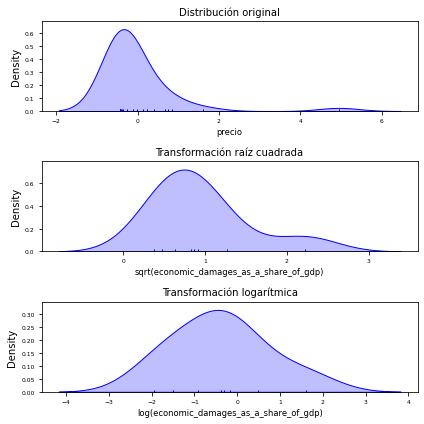

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [53]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,57.131278,2592.665905,32.097888,inf,0.562936,2.154623e-10
gamma,77.776095,619.229721,38.781299,inf,0.493594,6.040567e-08
chi2,98.267997,546.559649,46.498821,inf,0.563989,1.962279e-10
expon,104.947257,1100.040019,45.172377,inf,0.574076,7.908193e-11
powerlaw,108.272455,409.478761,49.698249,inf,0.553664,4.856922e-10
lognorm,118.370409,1115.342054,52.640793,inf,0.484847,1.147758e-07
exponpow,127.239518,397.705751,55.025125,inf,0.619094,1.017064e-12
logistic,129.497746,1219.632549,52.109160,inf,0.347238,4.642936e-04
norm,134.831200,941.004943,53.441045,inf,0.335758,8.060702e-04
cauchy,143.563998,2547.151621,55.512036,inf,0.487301,9.600538e-08


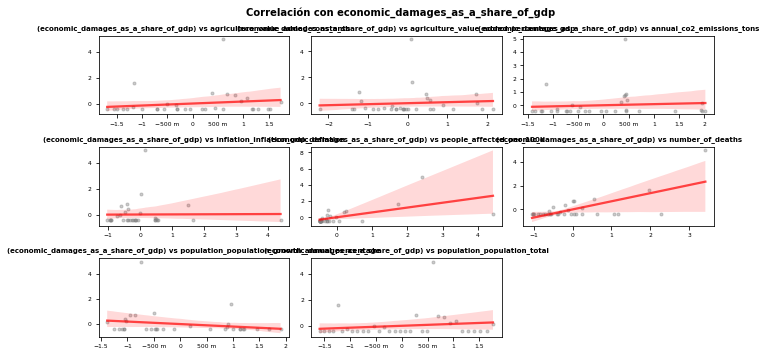

In [54]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### ROBUST MODELS

# NOTA:Como puedo graficar estos modelos ?
Entiendo que no puedo usar el scatter porque solo usa dos variables.

### linear regression on a dataset with outliers

In [55]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
#pyplot.scatter(X, y)
#pyplot.show()

(33, 9) (33,)


In [56]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)


#PREGUNTA: SEPUEDE GRAFICAR ESTA RELACION PARA MULTIPLES VARIABLES EXOGENAS?
# CREO QUE SOLO SE PUEDEN GRAFICAR LOS RESIDUALES

#plt.scatter(X, y)
#plt.plot(X, y_line, 'r')
#plt.title('Best fit line using regression method')
#plt.xlabel('x-axis')
#plt.ylabel('y-axis')

#plt.show()

Mean MAE: 0.792 (0.588)
The parameters of the line: [-0.01850295  0.09859185  0.55807723  0.09402892  0.43389749  0.54142371
 -0.43639752 -1.02525847  0.26432392]


### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [57]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))




Mean MAE: 0.743 (0.587)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [58]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit




Mean MAE: 3.672 (7.699)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [59]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)

(33, 9)
(33,)
Mean MAE: 0.552 (0.481)


### Comparison

>Linear 0.792 (0.588)
>Huber 0.743 (0.587)
>RANSAC 2.896 (3.624)
>TheilSen 0.552 (0.476)


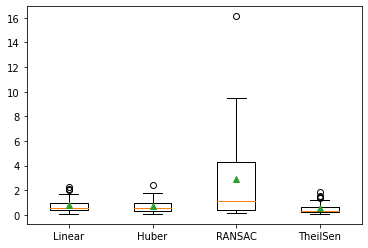

In [60]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

# NOTA: Como puedo graficar las  lineas de regresion en un modelo multivariado?

In [61]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
X = df_scaled[[
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print (X.shape)

# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load the dataset
X = df_scaled[
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']
y = df_scaled['economic_damages_as_a_share_of_gdp']

# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():

# plot the line of best fit
	plot_best_fit(X, y_pred, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()




(33, 7)


KeyError: ('annual_co2_emissions_tons', 'inflation_inflation_gdp_deflation', 'people_affected_per_100k', 'number_of_deaths', 'population_population_growth_annual_percentage', 'population_population_total', 'temperature_change_temp_change_celsius')

### Training and testing the linear regression model

In [63]:
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [64]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [65]:
print(Y_pred_multiple)
print(y_test)

[-0.14620841 -0.23730213 -0.17085381 -0.34613048 -0.50584705 -0.41180832
  0.75044638]
23    0.739529
5    -0.424069
31   -0.424069
30   -0.424069
2    -0.424069
11   -0.016886
22    4.951482
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [66]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 0.60468067 -0.00308376  0.29509217 -0.01205599  0.2066654   0.14170694
 -0.37899759 -1.18074493 -0.09085933]
Valor de la intersección o coeficiente "b":
-0.1528955100430519


In [67]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.4141149870763631


In [68]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.414
Model:                                            OLS   Adj. R-squared:                  0.085
Method:                                 Least Squares   F-statistic:                     1.257
Date:                                Mon, 29 Aug 2022   Prob (F-statistic):              0.330
Time:                                        00:57:53   Log-Likelihood:                -12.134
No. Observations:                                  26   AIC:                             44.27
Df Residuals:                                      16   BIC:                             56.85
Df Model:                                           9                                         
Covariance Type:                            nonrobust                                         
                                                  

In [69]:
print(modelo.pvalues)

const                                             0.151128
agriculture_value_added_constants                 0.676498
agriculture_value_added_percentage_gdp            0.988741
annual_co2_emissions_tons                         0.686096
inflation_inflation_gdp_deflation                 0.915119
people_affected_per_100k                          0.090097
number_of_deaths                                  0.276130
population_population_growth_annual_percentage    0.459031
population_population_total                       0.483586
temperature_change_temp_change_celsius            0.541952
dtype: float64


In [70]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.367878,0.062087
agriculture_value_added_constants,-2.411479,3.620840
agriculture_value_added_percentage_gdp,-0.459163,0.452995
annual_co2_emissions_tons,-1.224761,1.814946
inflation_inflation_gdp_deflation,-0.248086,0.223974
people_affected_per_100k,-0.036196,0.449527
number_of_deaths,-0.124713,0.408127
population_population_growth_annual_percentage,-1.437887,0.679891
population_population_total,-4.670763,2.309273
temperature_change_temp_change_celsius,-0.399943,0.218224


### Complete model without split

In [72]:
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -1.3240941526824707e-16
Coefficients: [-0.01850295  0.09859185  0.55807723  0.09402892  0.43389749  0.54142371
 -0.43639752 -1.02525847  0.26432392]


## Model Validation

In [73]:
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.654
Model:                                            OLS   Adj. R-squared:                  0.518
Method:                                 Least Squares   F-statistic:                     4.823
Date:                                Mon, 29 Aug 2022   Prob (F-statistic):            0.00109
Time:                                        00:58:03   Log-Likelihood:                -29.330
No. Observations:                                  33   AIC:                             78.66
Df Residuals:                                      23   BIC:                             93.63
Df Model:                                           9                                         
Covariance Type:                            nonrobust                                         
                                                  

In [74]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.6536412883427853


In [75]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 4.822793738238867
Probability of observing value at least as high as F-statistic: 0.0010932667961766624


In [76]:
print(olsmod_scaled.pvalues)

const                                             1.000000
agriculture_value_added_constants                 0.991808
agriculture_value_added_percentage_gdp            0.689777
annual_co2_emissions_tons                         0.553916
inflation_inflation_gdp_deflation                 0.506670
people_affected_per_100k                          0.008643
number_of_deaths                                  0.000702
population_population_growth_annual_percentage    0.493108
population_population_total                       0.629796
temperature_change_temp_change_celsius            0.132902
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Modelo OLS

In [77]:
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -1.3240941526824707e-16
Coefficients: [-0.01850295  0.09859185  0.55807723  0.09402892  0.43389749  0.54142371
 -0.43639752 -1.02525847  0.26432392]


In [78]:
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.654
Model:                                            OLS   Adj. R-squared:                  0.518
Method:                                 Least Squares   F-statistic:                     4.823
Date:                                Mon, 29 Aug 2022   Prob (F-statistic):            0.00109
Time:                                        00:58:05   Log-Likelihood:                -29.330
No. Observations:                                  33   AIC:                             78.66
Df Residuals:                                      23   BIC:                             93.63
Df Model:                                           9                                         
Covariance Type:                            nonrobust                                         
                                                  

In [79]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.6536412883427853


In [80]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 4.822793738238867
Probability of observing value at least as high as F-statistic: 0.0010932667961766624


In [81]:
print(olsmod_scaled.pvalues)

const                                             1.000000
agriculture_value_added_constants                 0.991808
agriculture_value_added_percentage_gdp            0.689777
annual_co2_emissions_tons                         0.553916
inflation_inflation_gdp_deflation                 0.506670
people_affected_per_100k                          0.008643
number_of_deaths                                  0.000702
population_population_growth_annual_percentage    0.493108
population_population_total                       0.629796
temperature_change_temp_change_celsius            0.132902
dtype: float64


In [82]:
df_scaled['residual'] = olsmod_scaled.resid

### Assumption Testing

# NOTA: COMO PUEDO GRAFICAR SIN ERROR


#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

# DUDA: POR QUE NO ME DEJA HACER LA PREDICCION?


In [83]:
df_scaled['predictions'] = olsmod.predict(X)

ValueError: shapes (33,10) and (2,) not aligned: 10 (dim 1) != 2 (dim 0)

In [84]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "['predictions'] not in index"

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.5479950308810115


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


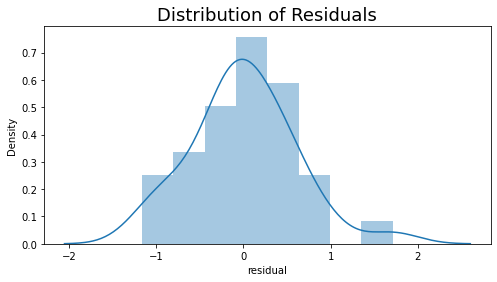

Residuals are normally distributed


In [85]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                                 agriculture_value_added_constants  \
agriculture_value_added_constants                                        1.000000   
agriculture_value_added_percentage_gdp                                  -0.317693   
annual_co2_emissions_tons                                                0.958719   
inflation_inflation_gdp_deflation                                       -0.100523   
economic_damages_as_a_share_of_gdp                                       0.154304   
people_affected_per_100k                                                 0.191597   
number_of_deaths                                                         0.091037   
population_population_growth_annual_percentage                          -0.959199   
population_population_total                                              0.996825   
temperature_change_temp_change_celsius                                   0.565707   

     

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


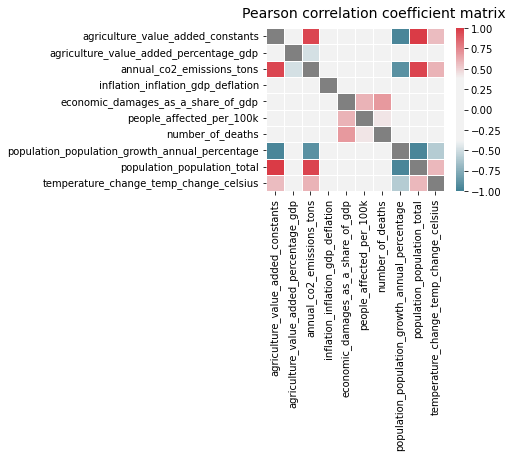

In [86]:
corr = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [87]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.6057624785317546
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

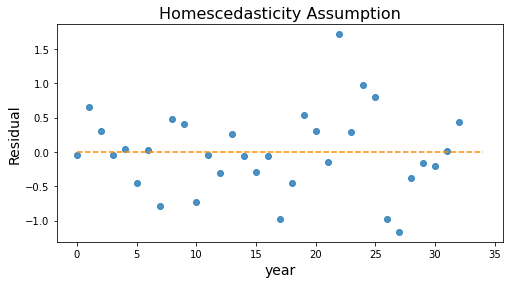

In [88]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Theil Sen Model: selected by the MAE criteria

In [89]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# define the model
model = TheilSenRegressor()

#Entreno el modelo
model_th = model.fit(X_train, y_train)


#Realizo una predicción
Y_pred = regr.predict(X_test)


# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)


Mean MAE: 0.551 (0.480)


In [90]:
def mape(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape(y_test, y_pred.reshape(-1,1))

108.88153077442304

In [91]:
print(Y_pred)
print(y_test)

[-0.12216163  0.74028685 -0.22380935 -0.44439669 -0.28921252  0.30327596
 -0.73057218]
12   -0.424069
27   -0.423702
30   -0.424069
31   -0.424069
24    0.683539
19    0.846169
2    -0.424069
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [92]:
print('Intercept:', model_th.intercept_)
print('Coefficients:', model_th.coef_)

Intercept: -0.04304113928497844
Coefficients: [-0.81303784  0.06107434 -0.43248845  0.08495589  0.70345059  0.00826383
  0.11968869  1.37291175  0.07479379]


In [93]:
print('Precisión del modelo:')
print(model_th.score(X_train, y_train))

Precisión del modelo:
0.3775398518615163


## Modelo DISCRETO: Random Forest 


In [94]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import svm

In [95]:
df_scaled.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,residual
0,-1.685699,-0.031227,-1.415663,-0.055098,-0.424069,-0.485865,-0.567536,1.902583,-1.591872,0.390779,-0.043948
1,-1.550603,0.642484,-1.364156,-0.214064,-0.424069,-0.451224,-1.011563,1.684315,-1.504119,-1.727250,0.658271
2,-1.486915,-0.107653,-1.221362,-0.542470,-0.424069,-0.485865,-1.015751,1.456634,-1.416035,-0.265626,0.306503
3,-1.379477,-0.306696,-1.228021,0.541478,-0.424069,-0.485865,0.092220,1.198955,-1.328072,-1.594746,-0.040921
4,-1.163550,0.107616,-1.141749,0.034792,1.610000,1.721218,1.975143,0.971359,-1.240060,-1.898487,0.049884


In [96]:
df_scaled=df_scaled.drop(['residual'],axis=1)
df_scaled.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,-1.685699,-0.031227,-1.415663,-0.055098,-0.424069,-0.485865,-0.567536,1.902583,-1.591872,0.390779
1,-1.550603,0.642484,-1.364156,-0.214064,-0.424069,-0.451224,-1.011563,1.684315,-1.504119,-1.727250
2,-1.486915,-0.107653,-1.221362,-0.542470,-0.424069,-0.485865,-1.015751,1.456634,-1.416035,-0.265626
3,-1.379477,-0.306696,-1.228021,0.541478,-0.424069,-0.485865,0.092220,1.198955,-1.328072,-1.594746
4,-1.163550,0.107616,-1.141749,0.034792,1.610000,1.721218,1.975143,0.971359,-1.240060,-1.898487


In [97]:
# Set independent and dependent variables
y = np.array(df_scaled['economic_damages_as_a_share_of_gdp'])
X = df_scaled.drop(['economic_damages_as_a_share_of_gdp'],axis=1)

In [98]:
feature_list = list(X.columns)
feature_list

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

In [99]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (24, 9)
y_train shape: (24,)
X_test shape: (9, 9)
y_test shape: (9,)


# Duda 1: Esta bien establecido mi baseline predictions?
# Duda 2: Para el error promedio de linea base se utiliza el baseline predictions?
# Duda 3: Para tener una linea de seguimiento en mi arbol, es decir que mi variable seed sea people affected per 100k y mi variable final se Economic damages as share GDP, se requiere algun orden especifico en la entrada de mis variables?
En el caso de este modelo me limité a hacer un arbol de tres niveles de profundidad y me muestra variables que no consideré en el modelo final "New random forest with only the two most important variables". Por que?????
Ver el diagrama de arbol en small_tree en el indice general de mis notebook hasta abajo.
# Duda 4: Como seria un ejemplo de interpretacion de los resultados del diagrama? Tengo una ligera idea pero no estoy segura si lo entiendo bien.


In [100]:
# The baseline predictions 
baseline_preds = y_test

print('Error promedio de línea base: ', round(np.mean(baseline_preds), 2))

Error promedio de línea base:  -0.19


In [101]:
from sklearn.ensemble import RandomForestRegressor
# Crear una instancia del modelo con 1000 árboles de decisión 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenar el modelo con datos de entrenamiento 
rf.fit(X_train, y_train);

In [102]:
# Usar el método de predicción del bosque en las 
predictions= rf.predict(X_test)
# Calcular los errores absolutos  
mae = abs(predictions - y_test)
# Imprime el error absoluto medio (mae) 
print('Error absoluto medio:', round(np.mean(mae), 2))


Error absoluto medio: 0.56


In [103]:
# Calcular el error porcentual absoluto medio (MAPE) 
mape = 100 * (mae / y_test)
# Calcular y mostrar precisión 
accuracy = 100 - np.mean(mape) 
print('Precision:', round(accuracy, 2), '%')


Precision: 111.49 %


In [104]:
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.7401956589802197


In [105]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: people_affected_per_100k Importance: 0.6
Variable: number_of_deaths     Importance: 0.29
Variable: temperature_change_temp_change_celsius Importance: 0.05
Variable: agriculture_value_added_percentage_gdp Importance: 0.02
Variable: agriculture_value_added_constants Importance: 0.01
Variable: annual_co2_emissions_tons Importance: 0.01
Variable: inflation_inflation_gdp_deflation Importance: 0.01
Variable: population_population_growth_annual_percentage Importance: 0.01
Variable: population_population_total Importance: 0.01


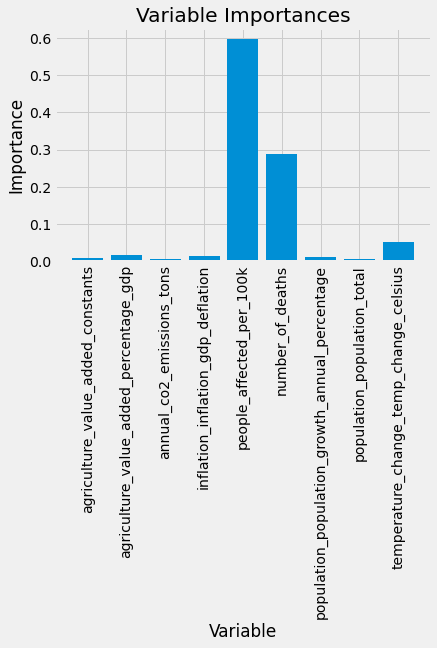

In [106]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


#### Estimators number selection

En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

In [107]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\Laura\anaconda3\envs\mlenv\li

Valor óptimo de n_estimators: 6


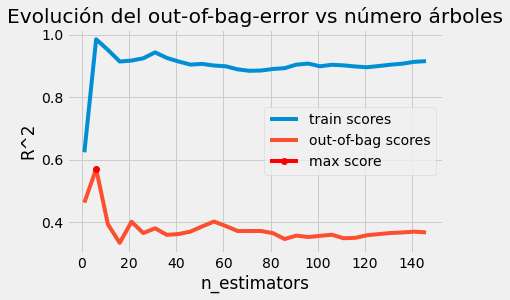

In [108]:
# Validación empleando el Out-of-Bag error

train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

Valor óptimo de n_estimators: 81


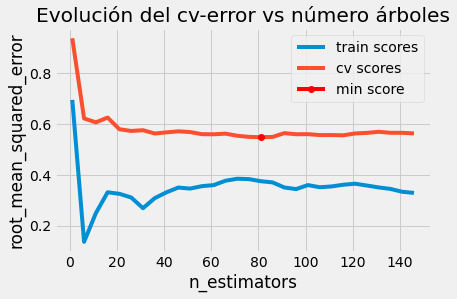

In [109]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error

train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Ambas métricas indican que, a partir de entre 6 y 80 árboles, el error de validación del modelo se estabiliza.

#### Max features validation
El valor de máx_features es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

Valor óptimo de max_features: 9


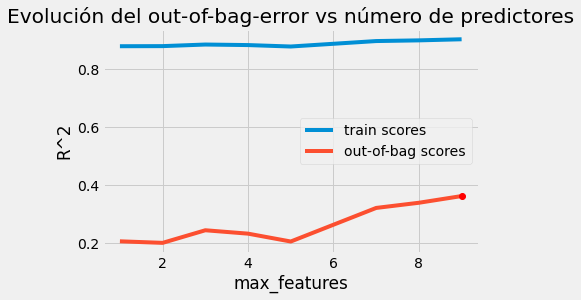

In [110]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Lau

Valor óptimo de max_features: 9


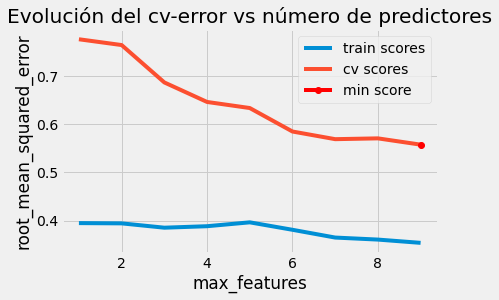

In [111]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Acorde a las dos métricas utilizadas, el valor óptimo de max_features está en 9.

#### Grid Search
Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás.

In [112]:
from sklearn.model_selection import ParameterGrid
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
5,0.386763,3.0,9.0,150.0
2,0.374469,NaN,9.0,150.0
8,0.374469,10.0,9.0,150.0
11,0.374469,20.0,9.0,150.0


In [ ]:
# VERSIÓN PARALELIZADA
# ==============================================================================
import multiprocessing
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 123,
        ** params            
    )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_r2': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(X_train, y_train, RandomForestRegressor(), params) for params in param_grid]
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

In [ ]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_r2'], "R2")

#### Grid Search basado en validación cruzada


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "MEDV").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

In [ ]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 6, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('people_affected_per_100k'), feature_list.index('number_of_deaths')]

train_important = X_train.values[:,important_indices]
test_important = X_test.values[:,important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), '')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')



In [ ]:
# Error de test del modelo modificado
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
import pydot


In [ ]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


# MIL GRACIAS!!!!!

ref. https://www.cienciadedatos.net/documentos/py08_random_forest_python.html